In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4


1 spectrum  in use
 
Spectral Data File: P0886010501PNS003SRSPEC0003.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.176e-02 +/- 9.787e-04 (73.3 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-13
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.69e+04 sec
 Using fit statistic: chi
 Using Background File                P0886010501PNS003BGSPEC0003.FTZ
  Background Exposure Time: 1.69e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY6.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0886010501PNS003SRCARF0003.FTZ



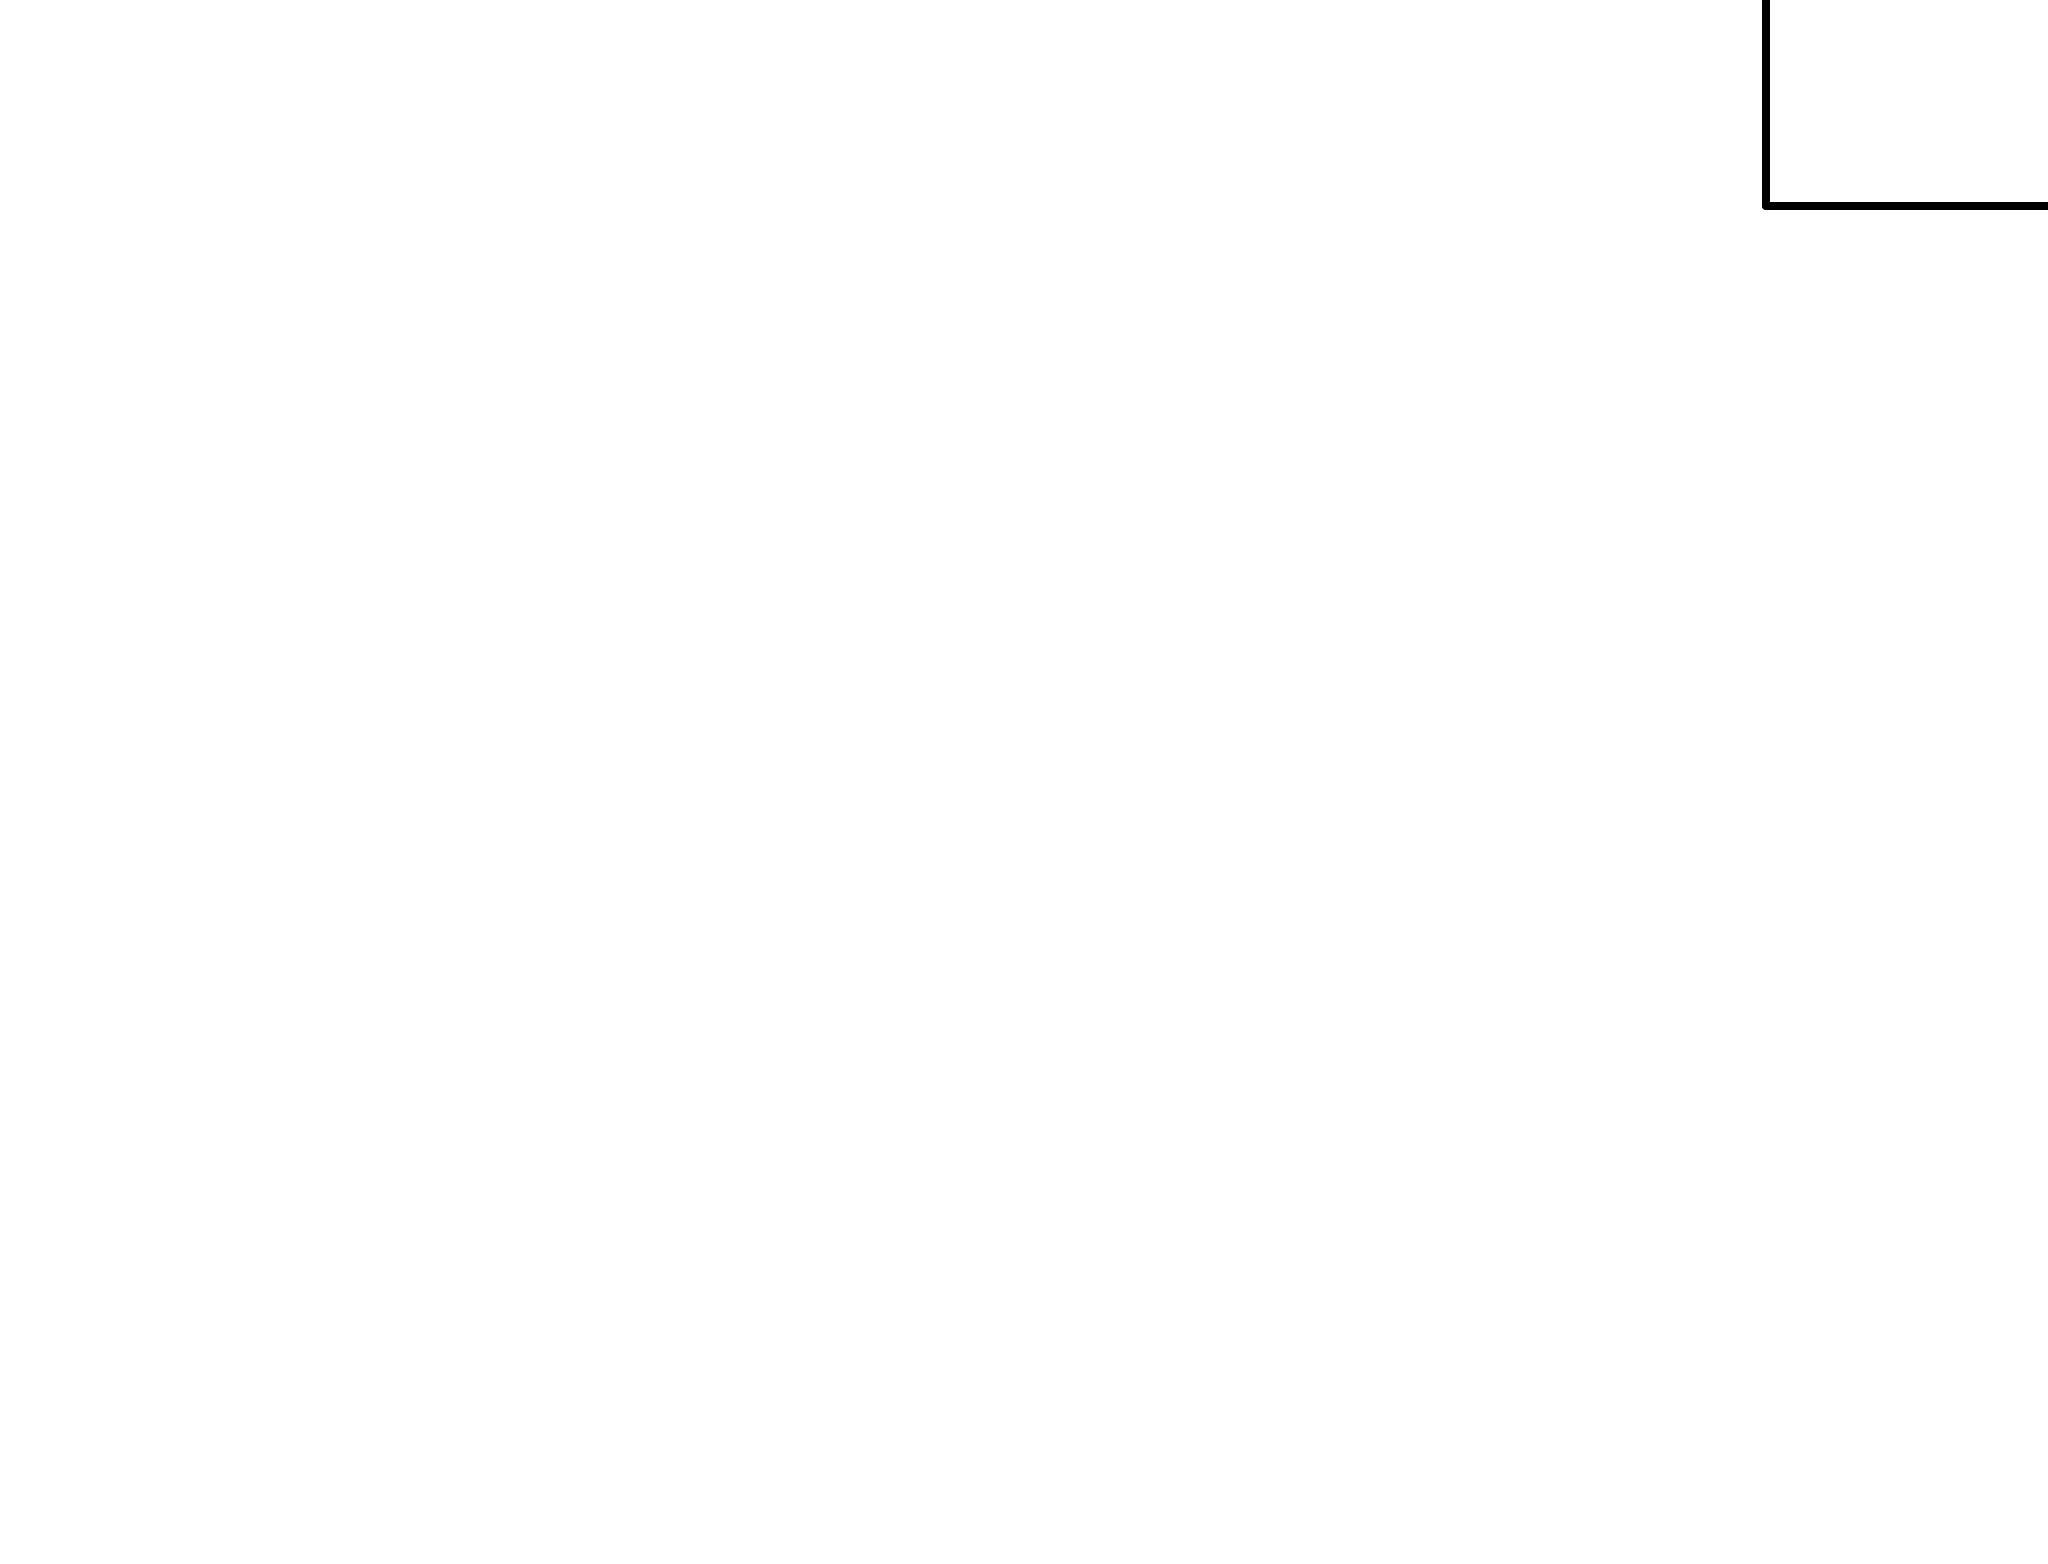

In [2]:
spec_fnames = glob.glob('P*PNS*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")

      No channels ignored (no channels in specified range)
     1 channels (13) ignored in spectrum #     1


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner

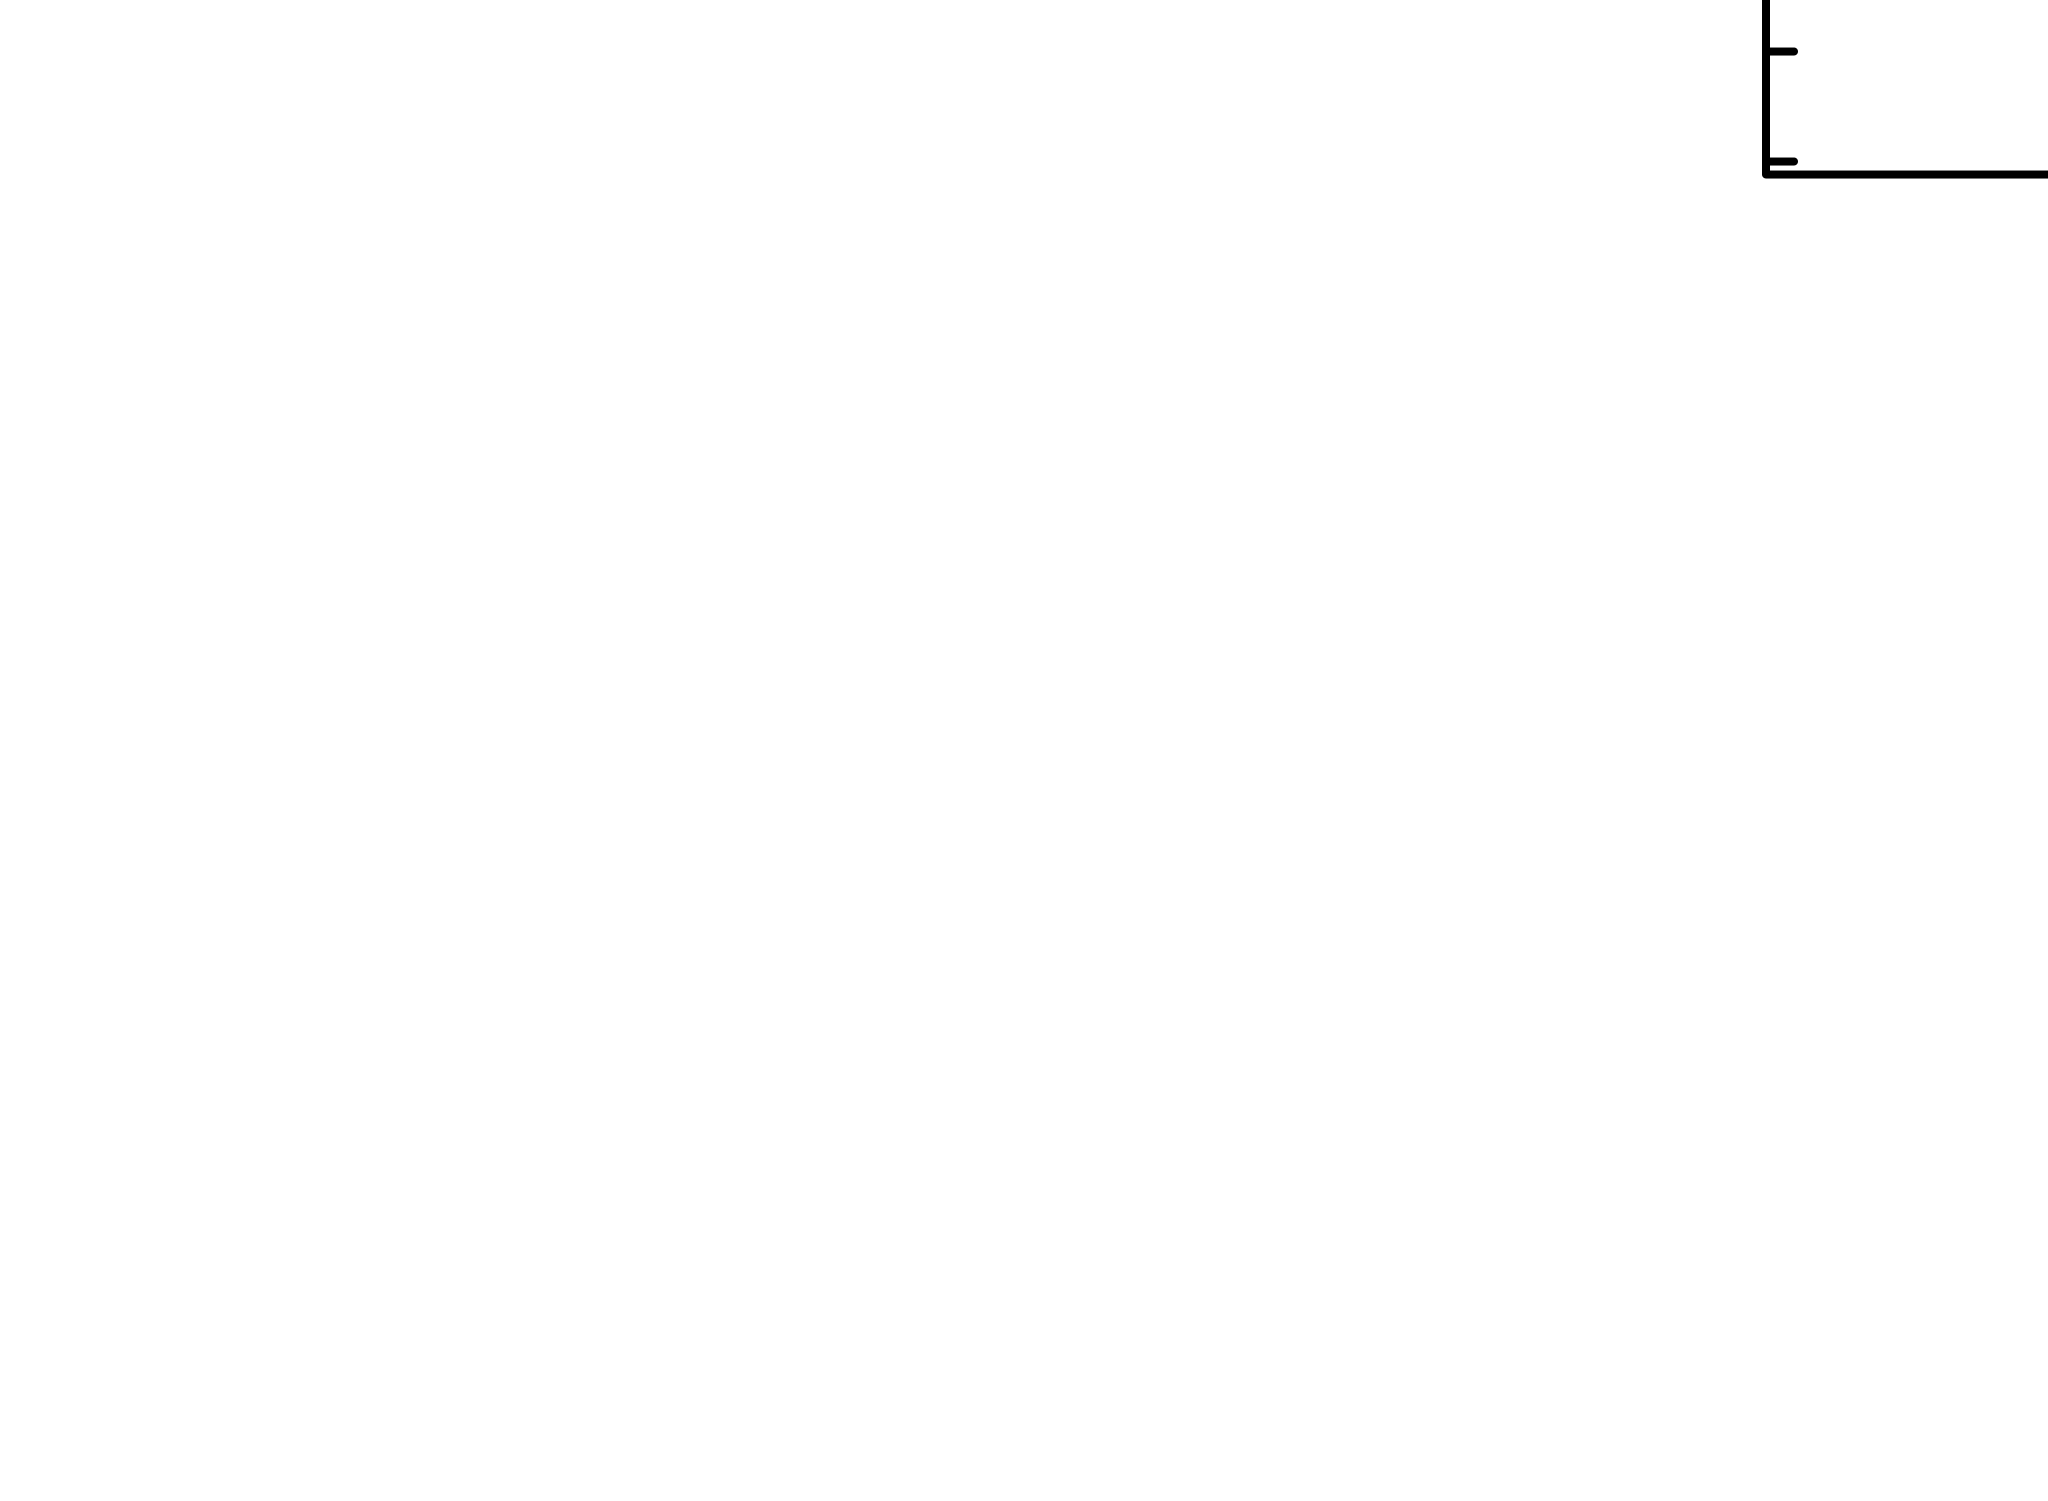

In [3]:
spec.ignore("**-0.2 12.0-**")
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

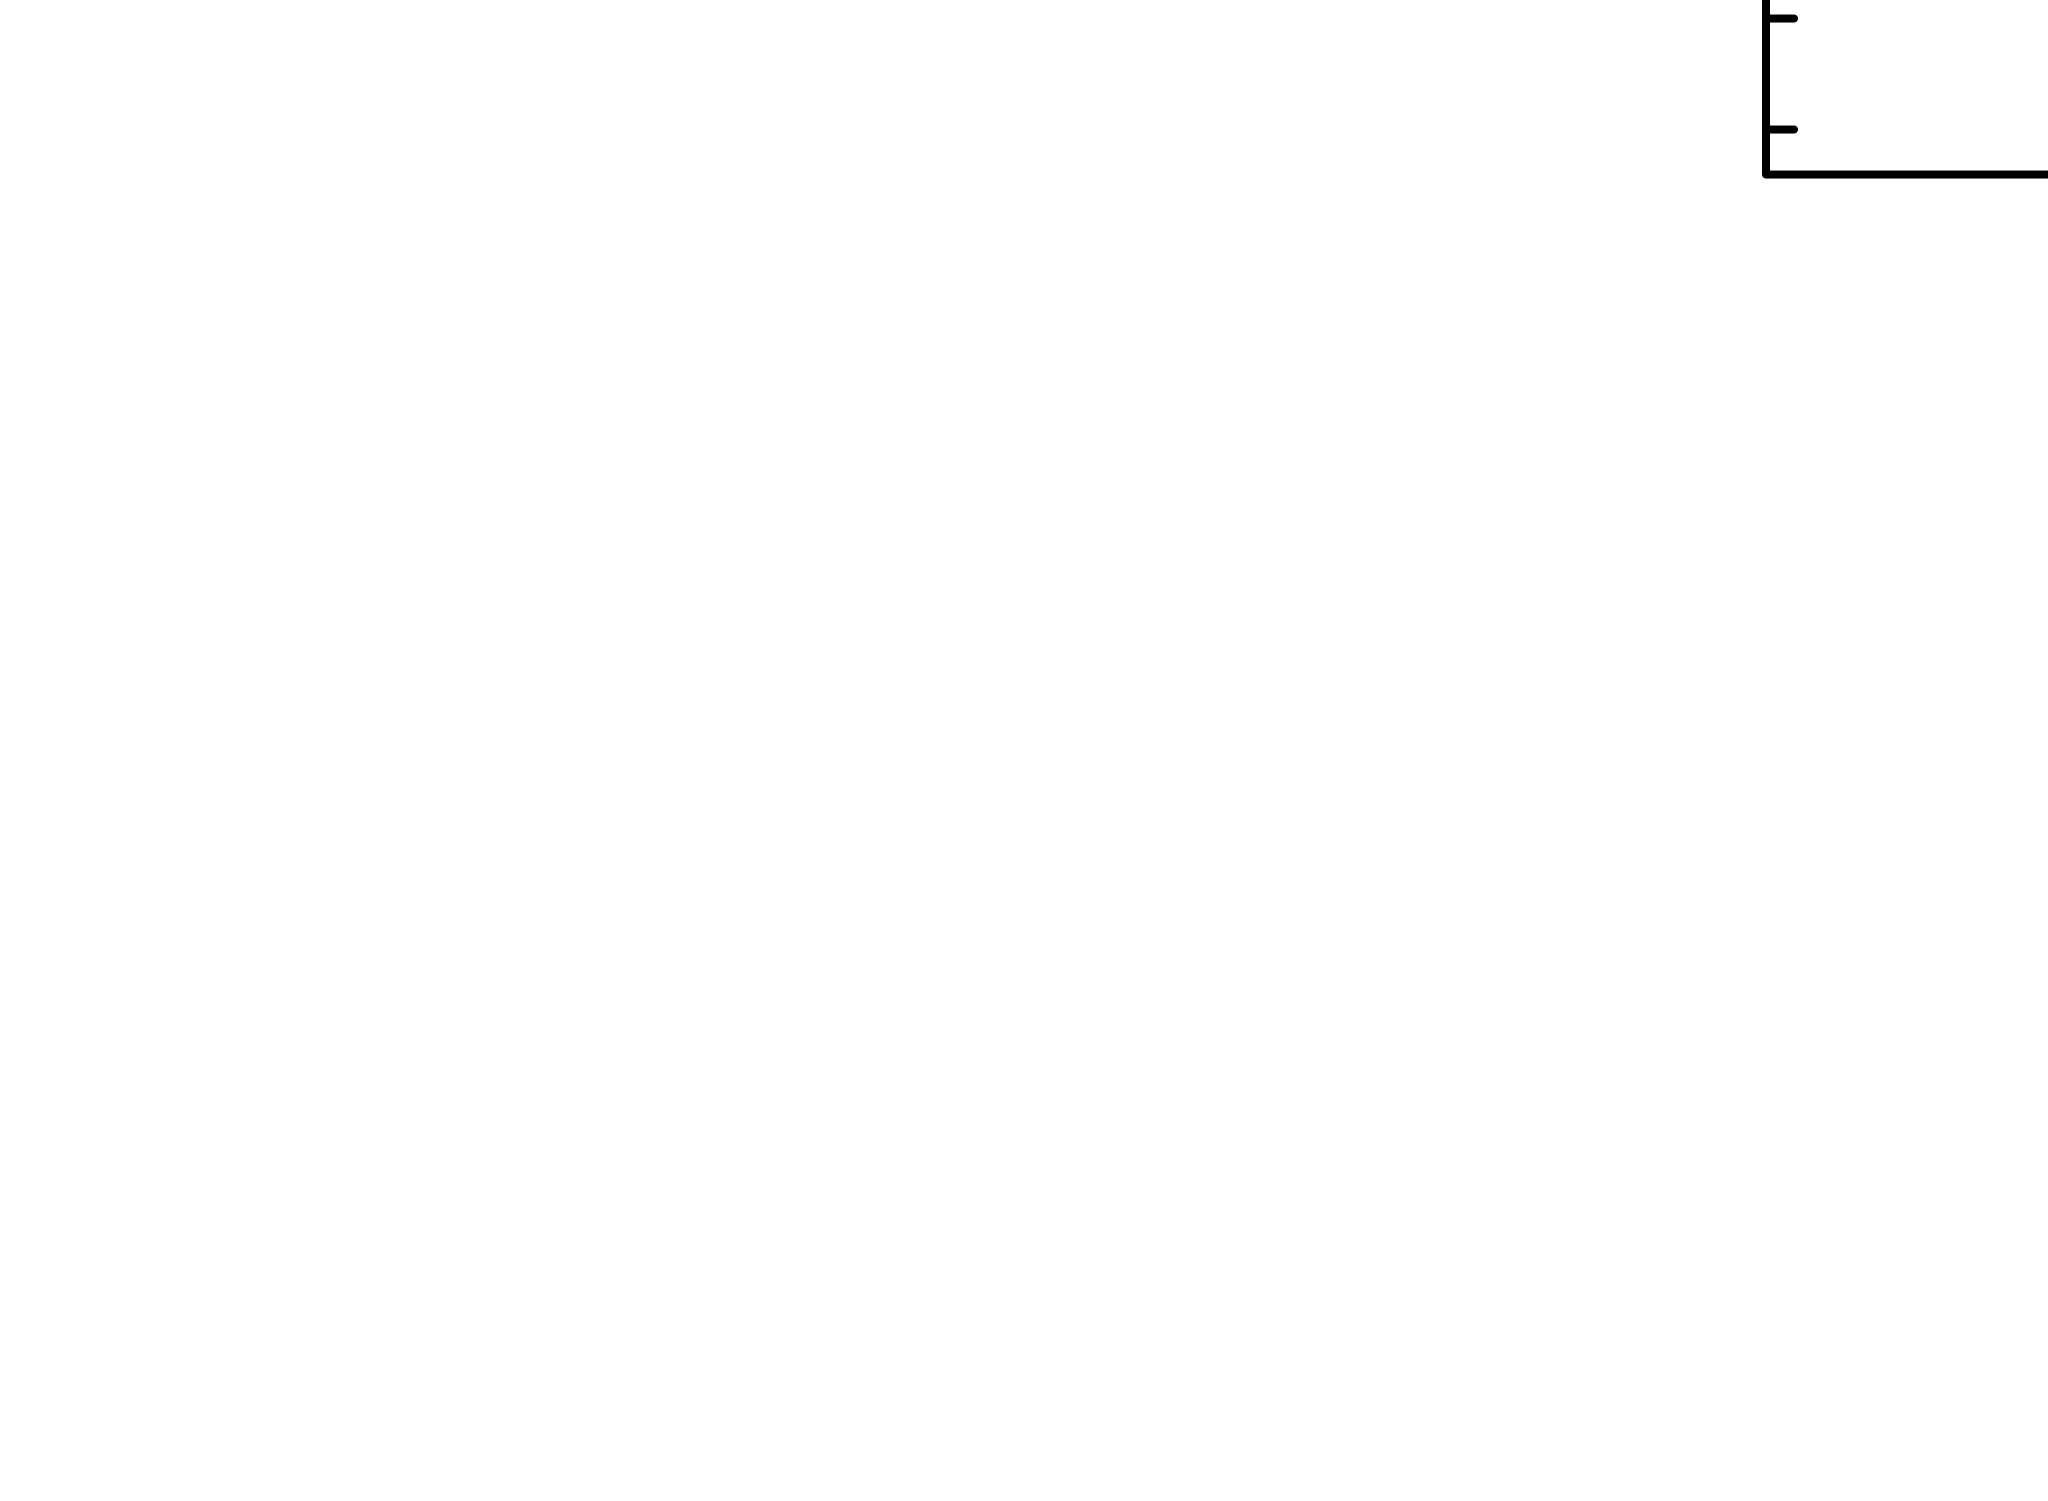


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.028015e+12     using 12 bins.

Test statistic : Chi-Squared              1.028015e+12     using 12 bins.
 Null hypothesis probability of 0.000000e+00 with 9 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
29.5561      12.886       -2       1.31093      -1.29070   4.65730e-07
29.0769      2.28141e+06  -1      0.385323      -1.19721   5.29246e-07
26.8244      1.02641e+06  -1       1.32445      -1.11776   6.30040e-07

In [4]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.453534e+11     using 12 bins.

Test statistic : Chi-Squared              2.453534e+11     using 12 bins.
 Null hypothesis probability of 0.000000e+00 with 9 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
122.333      4.89455       0       1.48458       48.7187   8.48048e-06
67.7666      515570       -1       7.02381       88.3404   4.05734e-05
22.0054      268127    

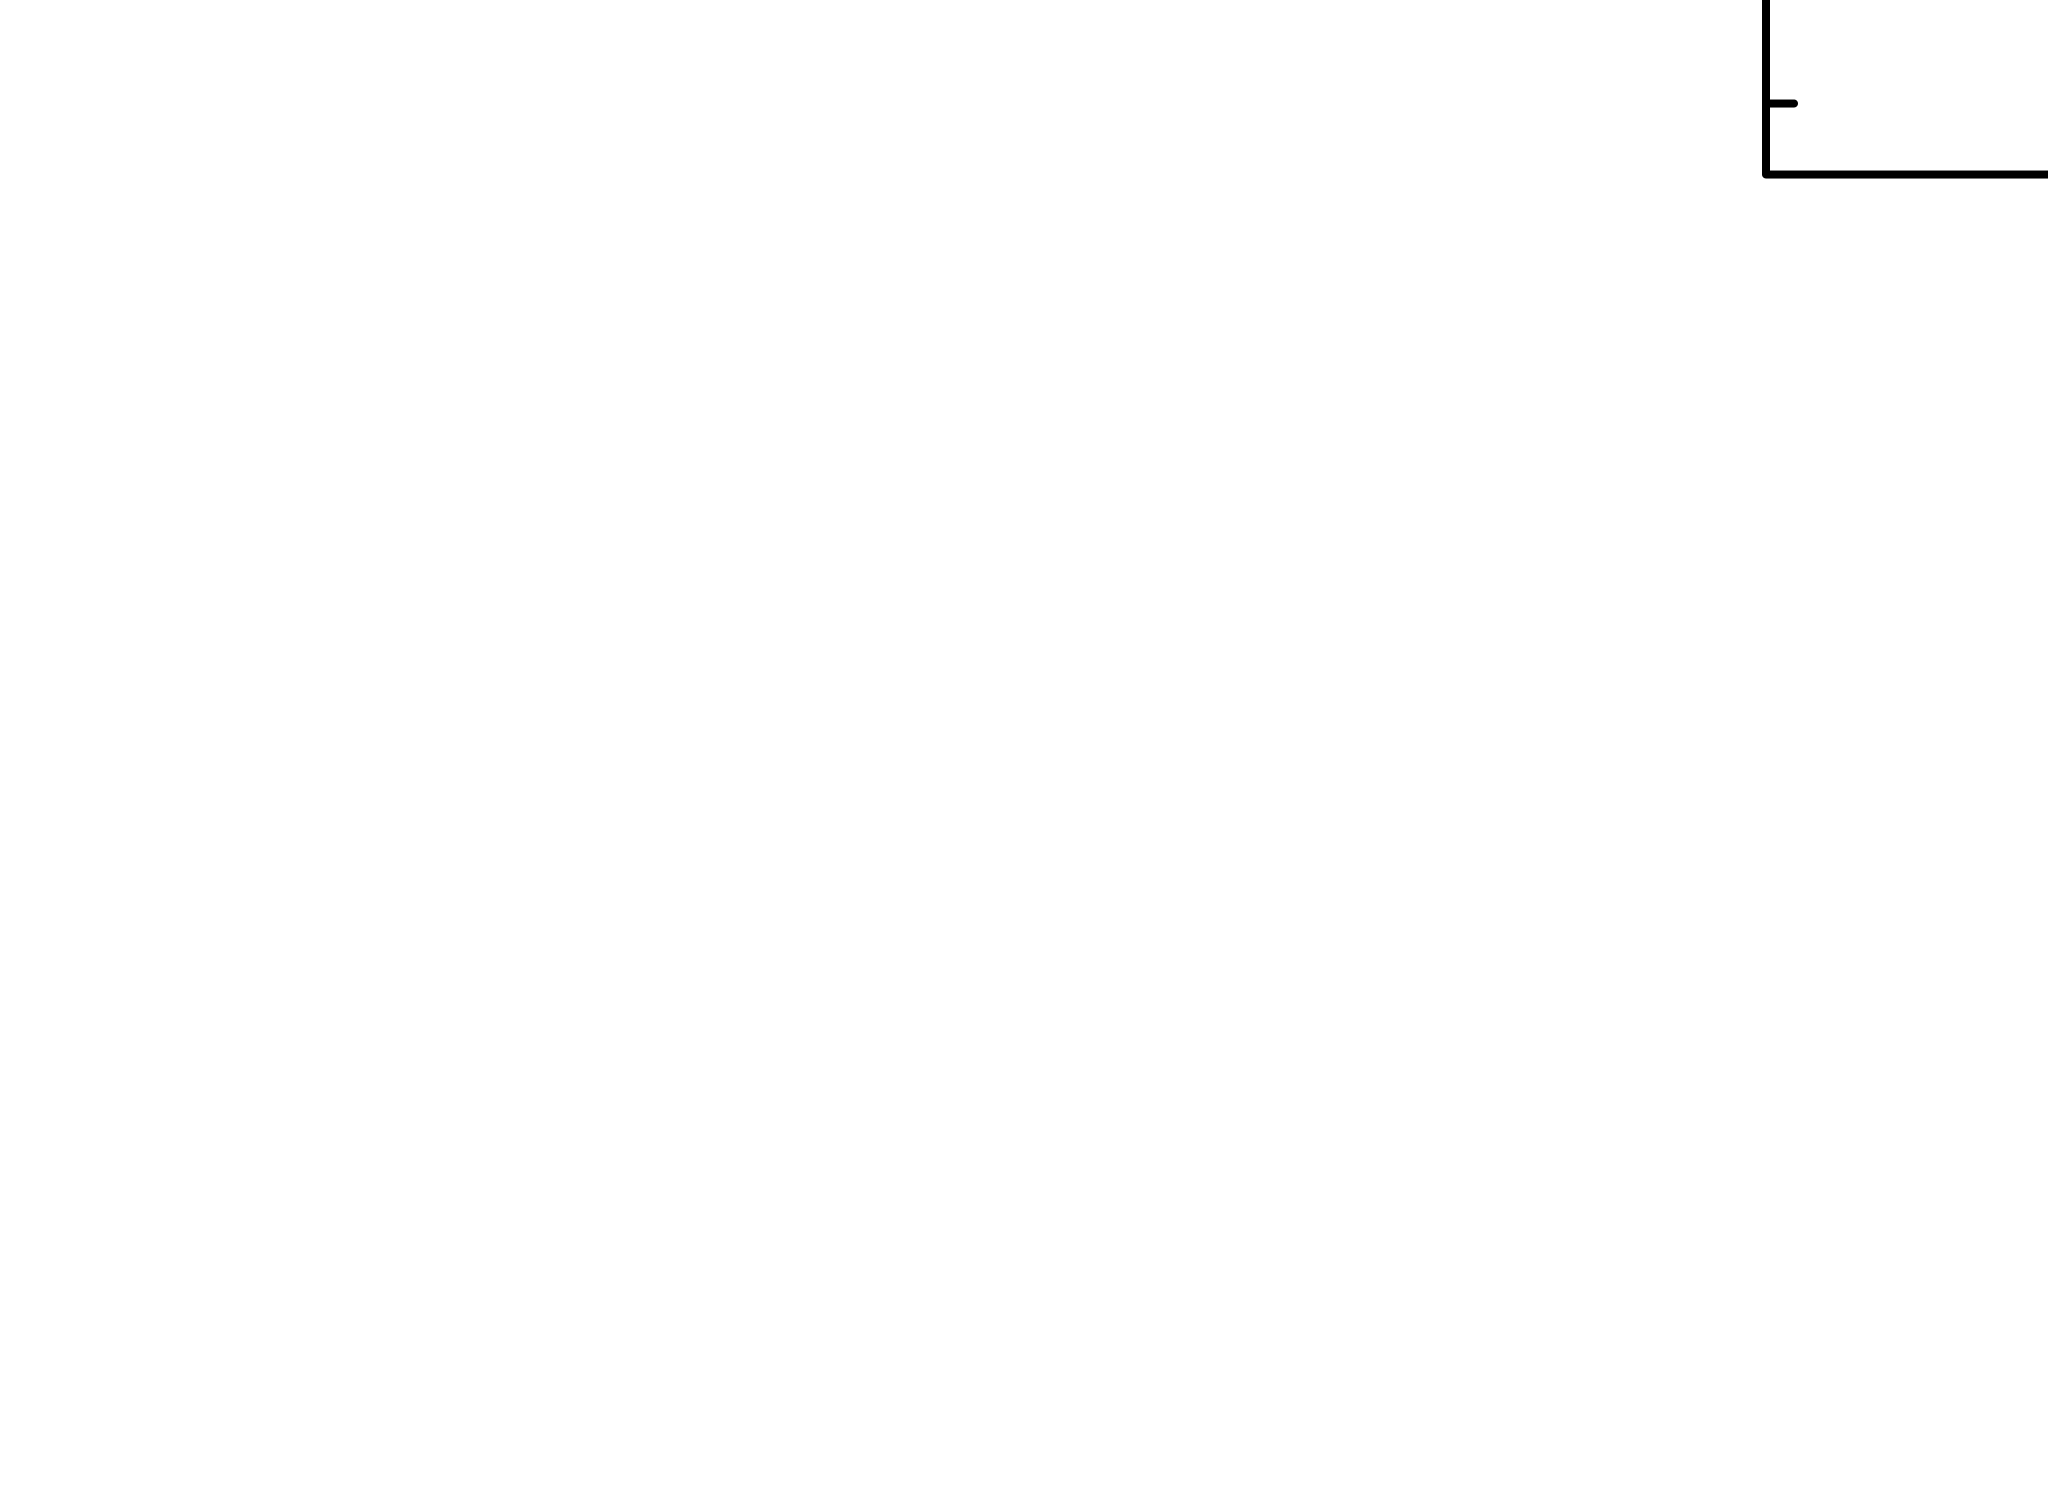

   -2       9.50691       199.179   0.000122531
19.3499      42413.7      -1       8.45680       199.036   0.000131246
19.334       4284.31       0       8.43416       199.030   0.000131952
19.3302      1992.24       0       8.42998       199.044   0.000132408
19.3294      735.253       0       8.43355       199.069   0.000132722
19.3292      9.21858       0       8.44006       199.099   0.000132951
19.329       430.692       0       8.44276       199.104   0.000132944
19.3289      353.997       0       8.44522       199.108   0.000132939
19.3288      288.294       0       8.44744       199.113   0.000132937
19.3287      232.912       0       8.44947       199.117   0.000132936
19.3286      185.722       0       8.45132       199.121   0.000132936
 Variances and Principal Axes
                 1        2        3  
 1.2930E-10| -0.0000  -0.0000   1.0000  
 2.5435E+00|  1.0000   0.0012   0.0000  
 3.8389E+06| -0.0012   1.0000   0.0000  
----------------------------------------

  Covari

In [5]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

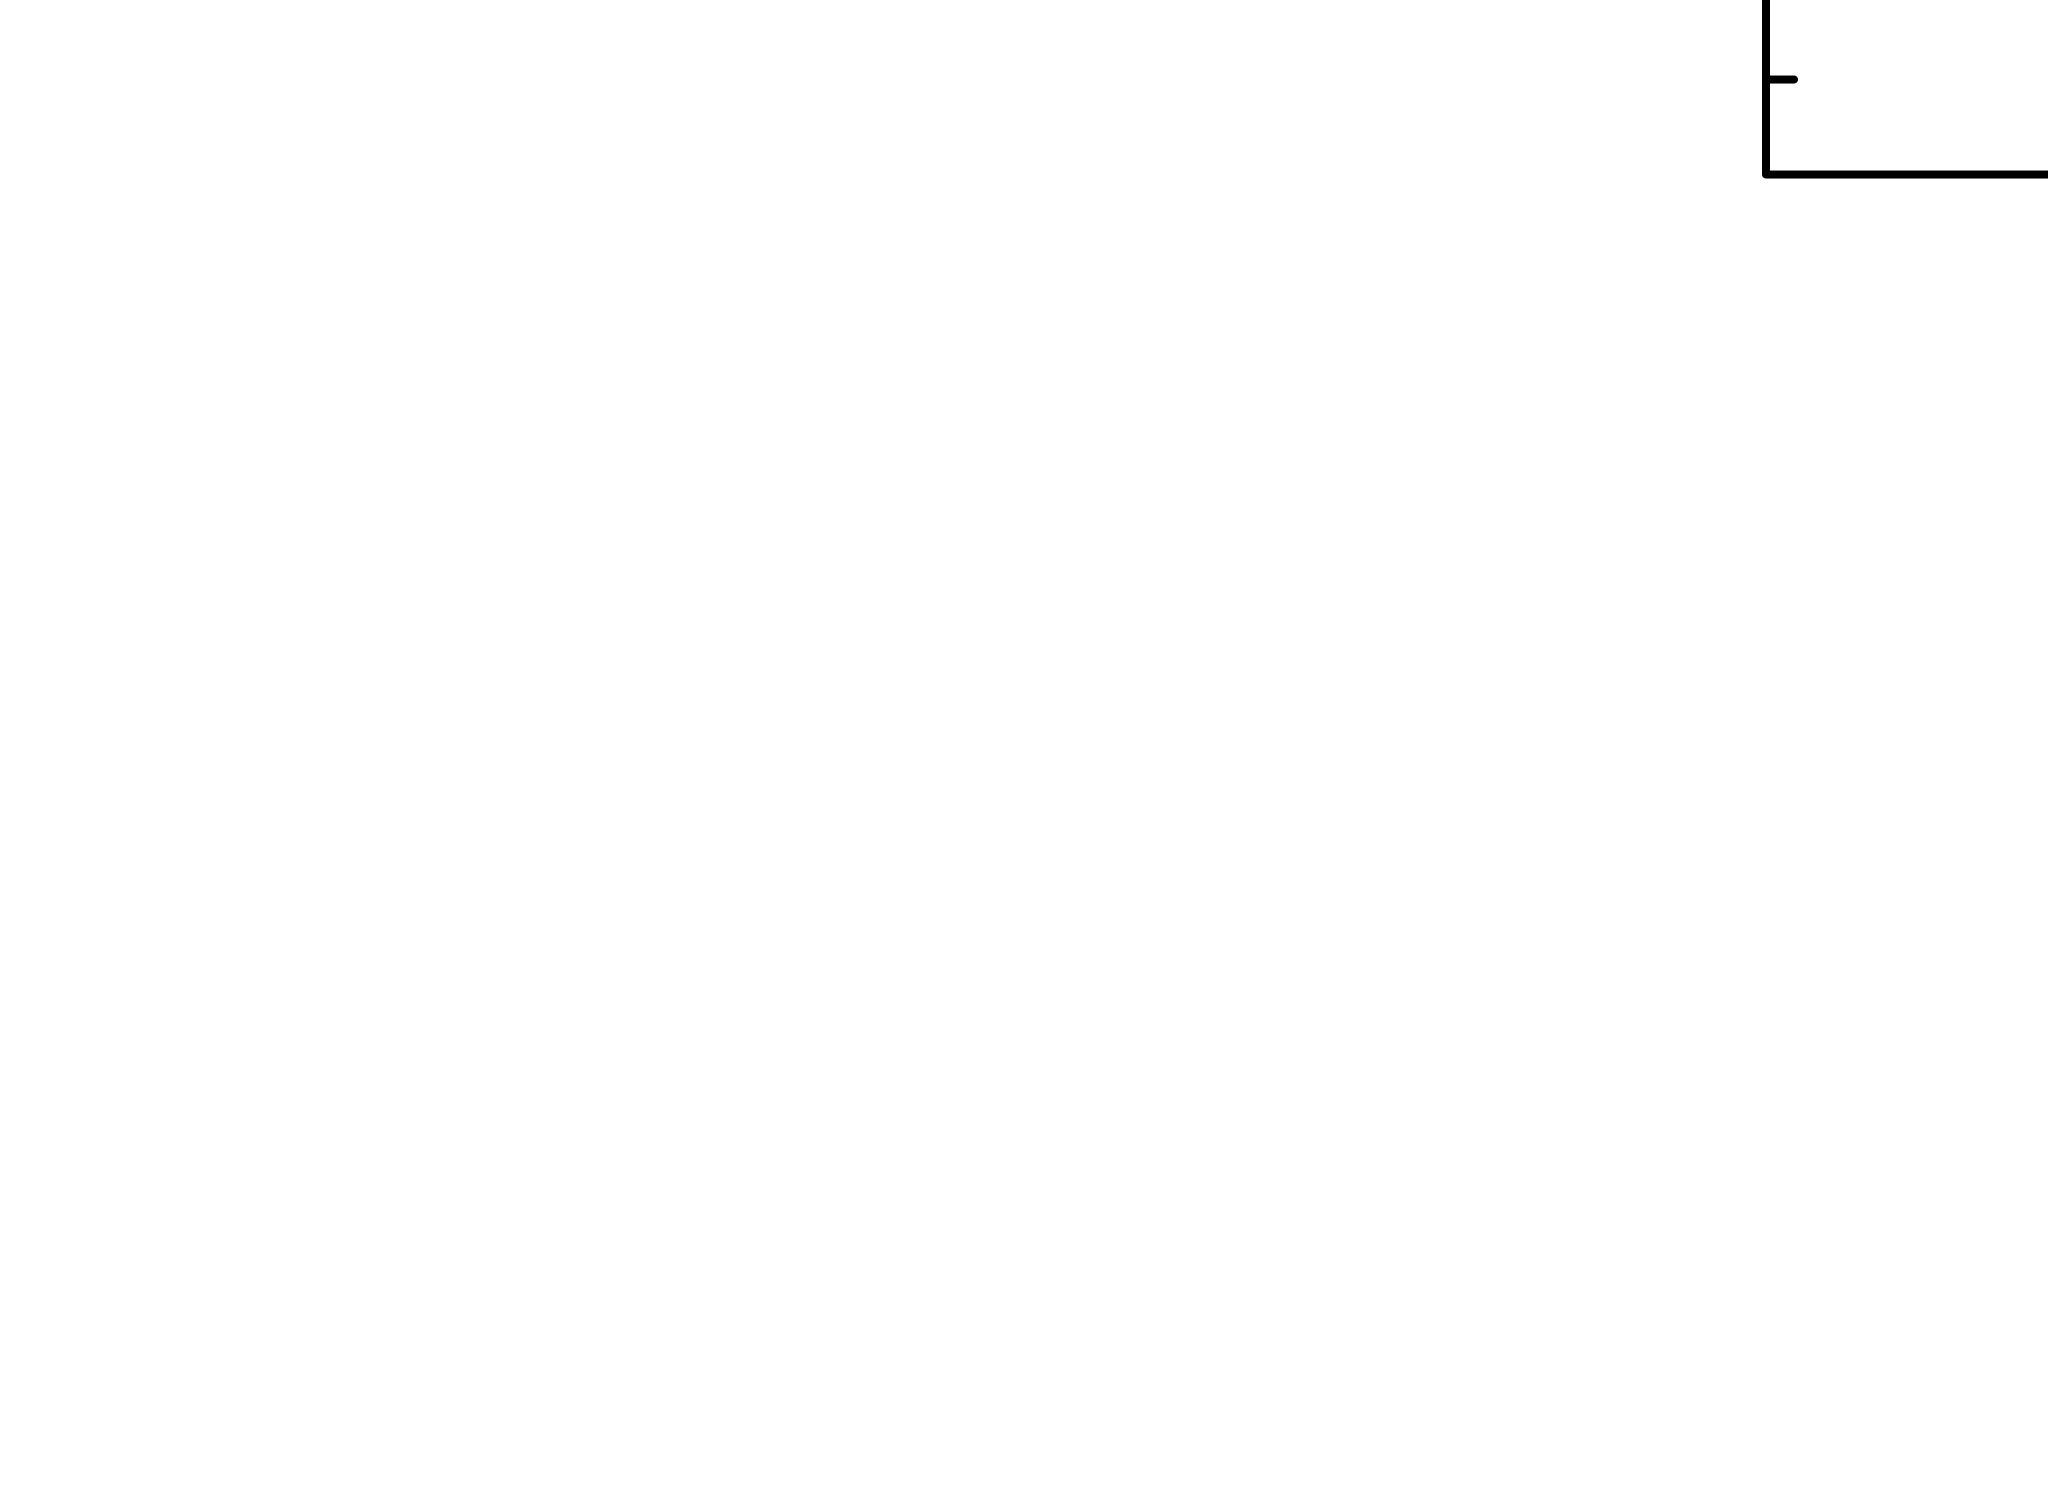


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.118547e+11     using 12 bins.

Test statistic : Chi-Squared              1.118547e+11     using 12 bins.
 Null hypothesis probability of 0.000000e+00 with 9 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
155.666      0.0449878    -2      0.352984       50.3518   1

In [6]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")